In [1]:
#check the gpu
!nvidia-smi

Tue Jul 20 05:47:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##Creating Helper Functions

It is good idea to put them into github and import them when you need

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2021-07-20 05:47:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-07-20 05:47:33 (64.5 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
#import helper functions 
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir


##Get the data

use the pre trained models within tf.keras.applications and apply them to our problems.

In [4]:
#get traning data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2021-07-20 05:47:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.73.208, 142.250.73.240, 142.250.65.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.73.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2021-07-20 05:47:36 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [5]:
#check out dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [6]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [7]:
import tensorflow as tf

In [8]:
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [9]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In [10]:
#checkout clssnames
train_data_10_percent.class_names


['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [11]:
#see a example of batch
for images,labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[109.015305     9.443878    40.030613  ]
   [122.14285     14.142858    44.785713  ]
   [139.71939     16.147959    46.93367   ]
   ...
   [241.28062    232.28062    157.28062   ]
   [241.33163    232.33163    157.33163   ]
   [240.22958    231.22958    156.22958   ]]

  [[130.26021     17.760204    50.331635  ]
   [138.07143     19.785715    49.857143  ]
   [150.9847      18.984694    49.72959   ]
   ...
   [241.         232.         157.        ]
   [240.93365    231.93365    156.93365   ]
   [239.66833    230.66833    155.66833   ]]

  [[151.43367     21.204082    51.938774  ]
   [155.5         19.071428    50.65816   ]
   [163.92857     18.785713    48.188774  ]
   ...
   [242.16837    233.16837    158.16837   ]
   [242.14284    233.14284    158.14284   ]
   [240.71936    231.71936    156.71936   ]]

  ...

  [[189.42853    212.         155.78574   ]
   [188.49995    211.85716    154.07143   ]
   [188.83163    209.78572    152.02045   ]
   ...
   [201.9746     237.382

##Create a transfer learning model using fucntional API

In [12]:
#create base model with tf.keras.applications
base_model =tf.keras.applications.EfficientNetB0(include_top=False)

#freeze the base model
base_model.trainbale=False

#create inputs into model
inputs =tf.keras.layers.Input(shape=(224,224,3),name="input_layer")

# #if using resnet50 you will need to normalzied inputs
# x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)(inputs)

#pass the inputs into base model
x=base_model(inputs)
print(f"Shape after passing inputs though base model :{x.shape}")

#avarage pool the outputs of the model
x=tf.keras.layers.GlobalAveragePooling2D(name="global_avarage_poolong_layer")(x)
print(f"Shspe after GlobalAvaragePoolong :{x.shape}")

#create the output activation layer
outputs =tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

#combine inputs outputs 
model_0 =tf.keras.Model(inputs,outputs)

#compile the model
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_10_percent =model_0.fit(train_data_10_percent,
            epochs=5,
            steps_per_epoch=len(train_data_10_percent),
            validation_data=test_data,
            validation_steps=int(0.25 *len(test_data)),
            callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                   experiment_name ="10_percent_feature_extraction"
                                                   )])


16711680/16705208 [==============================] - 0s 0us/step
Shape after passing inputs though base model :(None, 7, 7, 1280)
Shspe after GlobalAvaragePoolong :(None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20210720-054748
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 59s 723ms/step - loss: 1.3958 - accuracy: 0.5387 - val_loss: 1.2215 - val_accuracy: 0.6645
Epoch 2/5
24/24 [==============================] - 14s 557ms/step - loss: 0.3050 - accuracy: 0.9160 - val_loss: 0.9356 - val_accuracy: 0.7434
Epoch 3/5
24/24 [==============================] - 14s 561ms/step - loss: 0.1007 - accuracy: 0.9720 - val_loss: 1.4547 - val_accuracy: 0.6760
Epoch 4/5
24/24 [==============================] - 11s 455ms/step - loss: 0.0820 - accuracy: 0.9760 - val_loss: 1.2179 - val_accuracy: 0.7188
Epoch 5/5
24/24 [==============================] - 14s 565ms/step - loss: 0.0643 - accuracy: 0.9747 - val_loss: 0.8259 - val_accuracy: 0.7911


In [13]:
#evalaut the model
model_0.evaluate(test_data)

79/79 [==============================] - 10s 121ms/step - loss: 0.7238 - accuracy: 0.8056


[0.7237645983695984, 0.8055999875068665]

In [14]:
#check the layers in base model
for layer_number,layer in enumerate(base_model.layers):
  print(layer_number,layer.name)


0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [15]:
#summary
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, None, None, 3 7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization[0][0]              
_____________________________________________________________________________________

In [16]:
#whole model
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_avarage_poolong_layer (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 4,020,358
Non-trainable params: 42,023
_________________________________________________________________


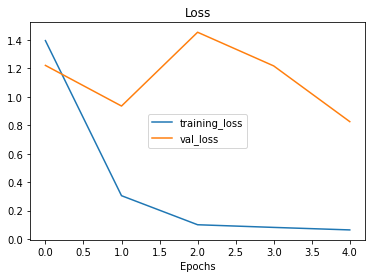

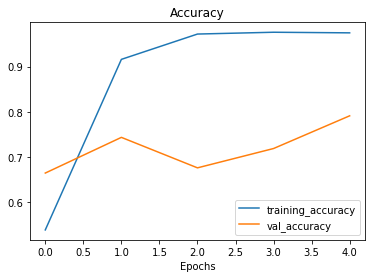

In [17]:
#check out the loss curver
plot_loss_curves(history_10_percent)

##Getting a Feature Vector from Trained Model

In [18]:
#define the input shape
input_shape= (1,4,4,3)

#create random tensor
input_tensor=tf.random.normal(input_shape)
print(f"Random input Tensor :\n {input_tensor} \n ")

#pass the random tensor thought global avarage pooling 2d layer
global_avarage_pooled_tensor =tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D Global Avarage Pooled Random Tensor :\n{global_avarage_pooled_tensor}\n ")

Random input Tensor :
 [[[[ 0.29852012  1.6033154  -2.245401  ]
   [-1.0114452   0.01460545  0.76661056]
   [-0.49371177 -0.35582927  0.36011934]
   [ 0.5472517   0.41074553 -0.45905715]]

  [[-0.6775295  -1.0023226  -2.5124786 ]
   [ 0.13635355 -2.0256631   0.2618558 ]
   [-0.3465372   0.59522384  1.6970518 ]
   [-0.3631299  -1.4032228  -0.6185182 ]]

  [[ 0.201366    0.03749953 -1.6546396 ]
   [ 0.11409999 -0.88242435  0.90565425]
   [-0.27395606 -0.3813228  -0.48728108]
   [ 0.9704725   1.7990415   0.55523854]]

  [[-0.356915    0.5049736  -0.8396849 ]
   [-0.2243021  -0.48430285 -0.7658    ]
   [-1.1165098  -0.23511577  0.508586  ]
   [ 0.36151993  0.8964714  -1.0474825 ]]]] 
 
2D Global Avarage Pooled Random Tensor :
[[-0.13965333 -0.05677047 -0.34845164]]
 


In [19]:
#check the shape
print(f"shape of the input tensor : {input_tensor.shape}")
print(f"shape of the global avarage pooled 2d tensor : {global_avarage_pooled_tensor.shape}")

shape of the input tensor : (1, 4, 4, 3)
shape of the global avarage pooled 2d tensor : (1, 3)


In [20]:
#replicate the global avarage pool 2d
tf.reduce_mean(input_tensor,axis=[1,2])


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.13965333, -0.05677047, -0.34845164]], dtype=float32)>

##Running a series of tranfer leraning experiments



In [21]:
#Downlaod and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2021-07-20 05:49:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.2.112, 172.217.12.240, 172.217.15.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.2.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   223MB/s    in 0.6s    

2021-07-20 05:49:59 (223 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [22]:
#craete test and train
train_dir_1_percent="10_food_classes_1_percent/train"
test_dir_1_percent="10_food_classes_1_percent/test"


##Preprocess data

In [23]:
#check for the images
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/train'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_wings'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/sushi'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/steak'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/pizza'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ice_cream'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/ramen'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/fried_rice'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/chicken_curry'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/grilled_salmon'.
There are 0 directories and 7 images in '10_food_classes_1_percent/train/hamburger'.
There a

In [24]:
#setup data loaders
IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

test_data_1_percent =tf.keras.preprocessing.image_dataset_from_directory(test_dir_1_percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMG_SIZE,
                                                                          batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


##Adding Data Augmetation into Model

In [26]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#craete data augmentation with horizontal flipping,rotation,zooms

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2)
                                   
],name="data_augmentation")

In [29]:
data_augmentation

##Visualize the Data Augmentation Layer

10_food_classes_1_percent/train/grilled_salmon/2521945.jpg


(-0.5, 531.5, 501.5, -0.5)

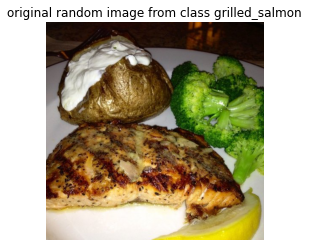

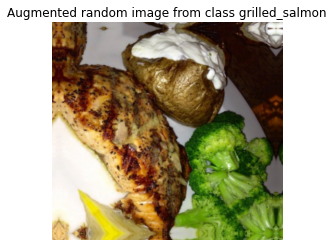

In [47]:
#view the random image and comapre it with the augmeted version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

target_class =random.choice(train_data_1_percent.class_names)
target_dir="10_food_classes_1_percent/train/" +target_class
random_image=random.choice(os.listdir(target_dir))
random_image_path =target_dir +"/"+random_image
print(random_image_path)

#read in the random image
img =mpimg.imread(random_image_path)
plt.imshow(img)
plt.title(f"original random image from class {target_class}")
plt.axis(False)

#plot our augmented random image
augmented_img =data_augmentation(tf.expand_dims(img,axis=0))
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.)
plt.title(f"Augmented random image from class {target_class}")
plt.axis(False)

##Model 1 :Feature extraction transfer learning with 1 percent of data

In [48]:
#setup the input shape
input_shape =(224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#crate the input layer
inputs =layers.Input(shape=input_shape,name="input_layer")

#add in data augmentation sequentional model as layer
x=data_augmentation(inputs)

#give base_model the inputs
x=base_model(x,training=False)

#pool output features of the model
x=layers.GlobalAveragePooling2D()(x)

#put a dense layer on the output
outputs =layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_1 =keras.Model(inputs,outputs)

#compile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1_percent =model_1.fit(train_data_1_percent,
                               epochs=5,
                               steps_per_epoch=len(train_data_1_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               
                               #track model callbacks
                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="1_percent_data_augmented")]
                               )

Saving TensorBoard log files to: transfer_learning/1_percent_data_augmented/20210720-063023
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3/3 [==============================] - 15s 4s/step - loss: 2.3753 - accuracy: 0.1143 - val_loss: 2.2079 - val_accuracy: 0.2253
Epoch 2/5
3/3 [==============================] - 4s 2s/step - loss: 2.0586 - accuracy: 0.3000 - val_loss: 2.0947 - val_accuracy: 0.2878
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9001 - accuracy: 0.4714 - val_loss: 1.9918 - val_accuracy: 0.3832
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.7274 - accuracy: 0.5286 - val_loss: 1.9041 - val_accuracy: 0.4326
Epoch 5/5
3/3 [==============================] - 4s 2s/step - loss: 1.5690 - accuracy: 0.6714 - val_loss: 1.8381 - val_accuracy: 0.4605


In [49]:
#model summary
model_1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation (Sequentia (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, None, None, 1280)  4049571   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                12810     
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [51]:
#evaluate on full dataset
results_1_percent_model=model_1.evaluate(test_data)
results_1_percent_model

79/79 [==============================] - 10s 117ms/step - loss: 1.7933 - accuracy: 0.4792


[1.7933119535446167, 0.47920000553131104]

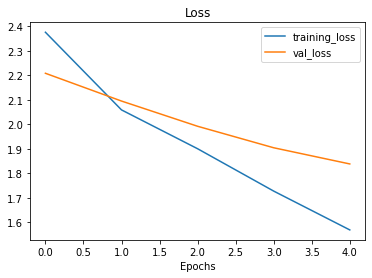

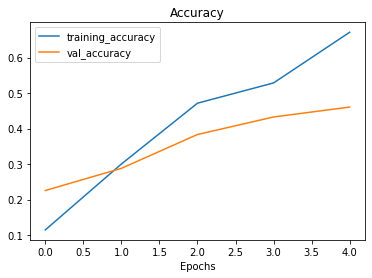

In [52]:
#loss curves
plot_loss_curves(history_1_percent)

##Model with 10 percent Augmented Data


In [60]:
#create training and test directories
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

IMG_SIZE=(224,224)
BATCH_SIZE=32
train_data_10_percent =tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

test_data=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                              image_size=IMG_SIZE,
                                                              label_mode="categorical",
                                                              batch_size=BATCH_SIZE)


Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [61]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#craete data augmentation with horizontal flipping,rotation,zooms

data_augmentation=keras.Sequential([
                                    preprocessing.RandomFlip("horizontal"),
                                    preprocessing.RandomRotation(0.2),
                                    preprocessing.RandomZoom(0.2),
                                    preprocessing.RandomHeight(0.2),
                                    preprocessing.RandomWidth(0.2)
                                   
],name="data_augmentation")

In [67]:
#setup the input shape
input_shape =(224,224,3)
base_model =tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

#crate the input layer
inputs =layers.Input(shape=input_shape,name="input_layer")

#add in data augmentation sequentional model as layer
x=data_augmentation(inputs)

#give base_model the inputs
x=base_model(x,training=False)

#pool output features of the model
x=layers.GlobalAveragePooling2D()(x)

#put a dense layer on the output
outputs =layers.Dense(10,activation="softmax",name="output_layer")(x)

#make a model
model_2 =keras.Model(inputs,outputs)

#compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])



##Creating a model checkpoint callbacks

In [66]:
#checkpoint path
checkpoint_path="ten_percent_model_checkpoints_weights/checkpoints.ckpt"

#create a model checkpoint callback that saves weights
checkpoint_callback =tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                        save_weights=True,
                                                        save_best_only=False,
                                                        save_freq="epoch",
                                                        verbose=1)

##Fit the model 2 with callbacks

In [68]:
#fit the model
initial_epochs =5

history_model_2 =model_2.fit(train_data_10_percent,
                               epochs=initial_epochs,
                               steps_per_epoch=len(train_data_10_percent),
                               validation_data=test_data,
                               validation_steps=int(0.25*len(test_data)),
                               
                               #track model callbacks
                               callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                      experiment_name="10_percent_data_augmented"),
                                          checkpoint_callback
                                          ]
                               )

Saving TensorBoard log files to: transfer_learning/10_percent_data_augmented/20210720-070829
Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


24/24 [==============================] - 21s 568ms/step - loss: 2.0449 - accuracy: 0.3067 - val_loss: 1.5237 - val_accuracy: 0.6365

Epoch 00001: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 2/5
24/24 [==============================] - 11s 454ms/step - loss: 1.3943 - accuracy: 0.6720 - val_loss: 1.0572 - val_accuracy: 0.7648

Epoch 00002: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 3/5
24/24 [==============================] - 9s 373ms/step - loss: 1.0849 - accuracy: 0.7533 - val_loss: 0.8635 - val_accuracy: 0.7977

Epoch 00003: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 4/5
24/24 [==============================] - 12s 495ms/step - loss: 0.9087 - accuracy: 0.7813 - val_loss: 0.7474 - val_accuracy: 0.8026

Epoch 00004: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets
Epoch 5/5
24/24 [==============================] - 9s 356ms/step - loss: 0.8166 - accuracy: 0.7933 - val_loss: 0.6902 - val_accuracy: 0.8141

Epoch 00005: saving model to ten_percent_model_checkpoints_weights/checkpoints.ckpt


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: ten_percent_model_checkpoints_weights/checkpoints.ckpt/assets


In [70]:
#evaluate
model_0.evaluate(test_data)

79/79 [==============================] - 10s 116ms/step - loss: 0.7238 - accuracy: 0.8056


[0.7237647175788879, 0.8055999875068665]

In [76]:
results_model_2=model_2.evaluate(test_data)

79/79 [==============================] - 10s 117ms/step - loss: 0.7088 - accuracy: 0.8080


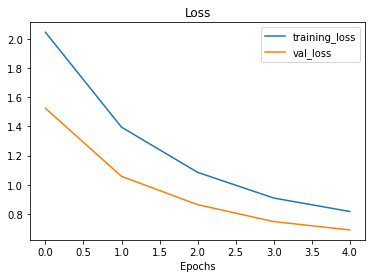

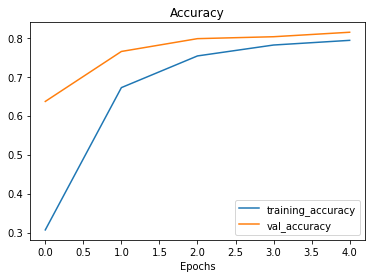

In [73]:
plot_loss_curves(history_model_2)

##Loading in checkpointed Weights

In [74]:
#loadin saved model weights
model_2.load_weights(checkpoint_path)

In [75]:
#evaluate model_2 with loaded model
loaded_weight_model_results=model_2.evaluate(test_data)

79/79 [==============================] - 10s 116ms/step - loss: 0.7088 - accuracy: 0.8080


In [77]:
#check to see loaded resuls with create model
import numpy as np
np.isclose(np.array(results_model_2),np.array(loaded_weight_model_results))

array([ True,  True])

In [78]:
#check the difference

print(np.array(results_model_2)-np.array(loaded_weight_model_results))

[-5.96046448e-08  0.00000000e+00]
